In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
## silhouette score
from sklearn.metrics import silhouette_score

In [9]:
iris= datasets.load_iris()

In [10]:
data = pd.DataFrame(iris.data)

In [11]:
data.columns = iris.feature_names

In [12]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
X_train,X_test,y_train,y_test = train_test_split(data,iris.target,random_state=42,test_size=0.2)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(X_train)


In [20]:
pca_scaled

array([[-2.74105758e+00,  4.15797708e-01],
       [-2.21457679e+00,  2.60476167e+00],
       [ 9.26828081e-01,  5.29167275e-01],
       [-2.29342856e+00,  1.08078302e-01],
       [-2.52454797e+00, -4.96938209e-01],
       [ 1.61592869e+00, -8.45685458e-01],
       [ 7.85811169e-01,  6.00685859e-01],
       [-2.13514310e+00,  5.02812496e-01],
       [-2.35529452e+00,  6.11496470e-01],
       [-2.57444158e+00,  1.72650436e+00],
       [ 1.21265689e+00, -6.72243586e-01],
       [ 4.87715650e-01,  8.28563454e-01],
       [ 1.10240335e+00,  5.40926576e-01],
       [-2.16734191e+00,  1.43281875e+00],
       [-2.13027316e+00,  1.00872997e+00],
       [ 5.89578956e-02, -1.52070801e+00],
       [ 1.16549744e+00, -2.60626060e-01],
       [ 1.40654278e+00,  4.31929714e-01],
       [ 9.24393111e-01,  2.76208537e-01],
       [ 2.33644371e+00,  1.90331881e+00],
       [ 2.75168318e-01, -3.68660142e-01],
       [ 2.81751610e+00,  8.36523663e-01],
       [ 4.02504353e-01, -1.91281837e-01],
       [-2.

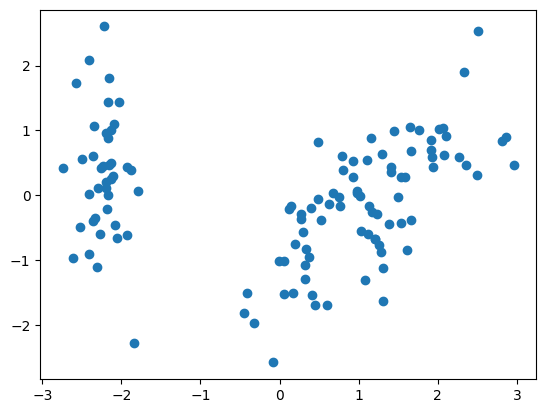

In [21]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

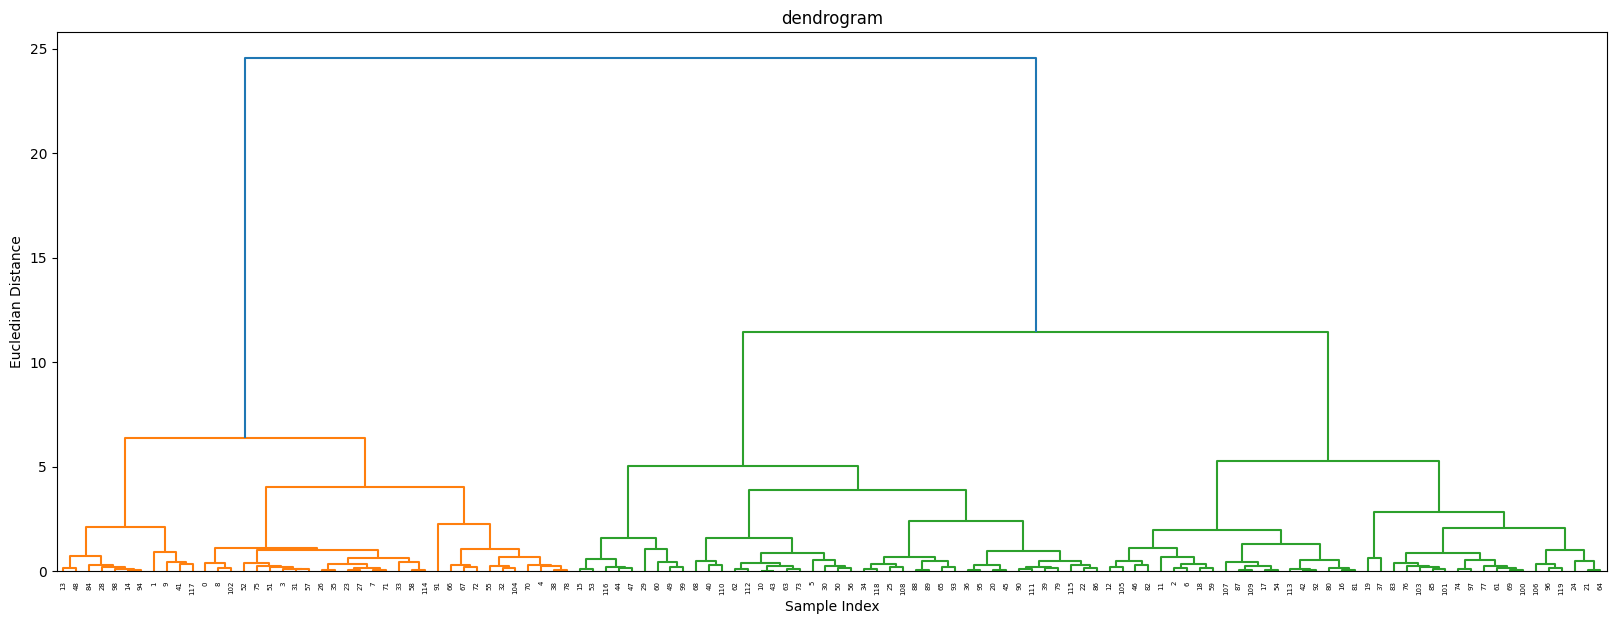

In [24]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

c:\Users\himan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [27]:
cluster.labels_

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

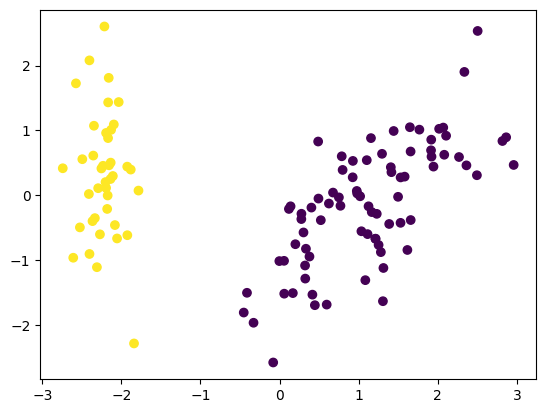

In [29]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [31]:
silhouette_coffe = []
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_train)
    score = silhouette_score(X_train,agglo.labels_)
    silhouette_coffe.append(score)


c:\Users\himan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\himan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\himan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\himan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\himan\AppData\L

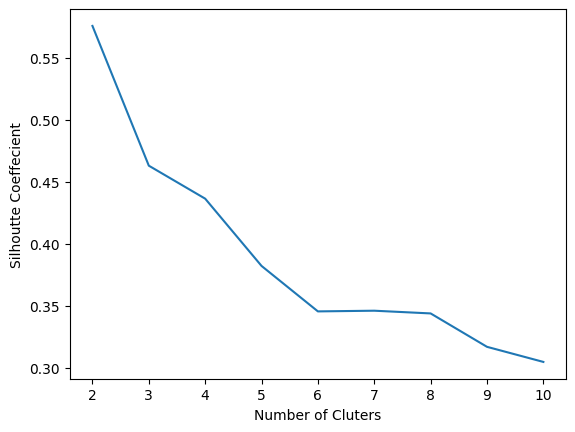

In [32]:
plt.plot(range(2,11,),silhouette_coffe)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()
